# Assignment 11
Analysing differences between monte carlo methods and quasi monte carlo methods

In [1]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# defining the van der corput sequence generator
def van_der_corput(i, base=2):
    ret = 0
    f = 1/base
    count = 1
    while(i > 0):
        t = i % base
        ret += (t*(f**count))
        i //= base
        count += 1
    return ret

## Q1
Generating and visualising the van der corput sequence generator

In [3]:
for i in range(26):
    print(f"i: {i}, --> {van_der_corput(i)}")

i: 0, --> 0
i: 1, --> 0.5
i: 2, --> 0.25
i: 3, --> 0.75
i: 4, --> 0.125
i: 5, --> 0.625
i: 6, --> 0.375
i: 7, --> 0.875
i: 8, --> 0.0625
i: 9, --> 0.5625
i: 10, --> 0.3125
i: 11, --> 0.8125
i: 12, --> 0.1875
i: 13, --> 0.6875
i: 14, --> 0.4375
i: 15, --> 0.9375
i: 16, --> 0.03125
i: 17, --> 0.53125
i: 18, --> 0.28125
i: 19, --> 0.78125
i: 20, --> 0.15625
i: 21, --> 0.65625
i: 22, --> 0.40625
i: 23, --> 0.90625
i: 24, --> 0.09375
i: 25, --> 0.59375


Text(0.5, 1.0, 'Van Der Corput Plot for ((xi, xi+1))')

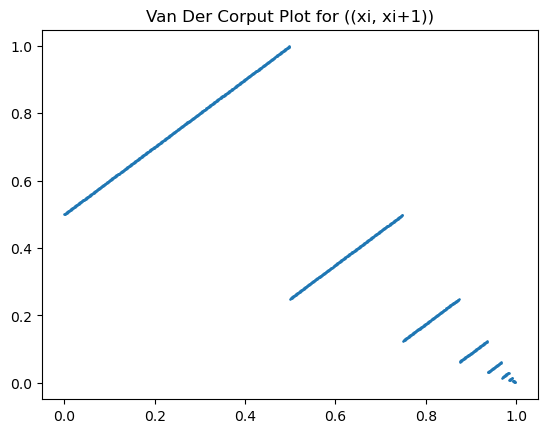

In [4]:
x = []
y = []
for i in range(1000):
    x.append(van_der_corput(i))
    y.append(van_der_corput(i+1))
    
plt.scatter(x, y, s=0.75)
plt.title('Van Der Corput Plot for ((xi, xi+1))')

## Q2
Comparing Van der Corput with LCG

In [5]:
# Defining a Linear Congruence Generator
def uniform_generator(x):
    a = 1597
    c = 2330197
    m = 2**32
    x = (a*x + c)%m
    return x/m, x

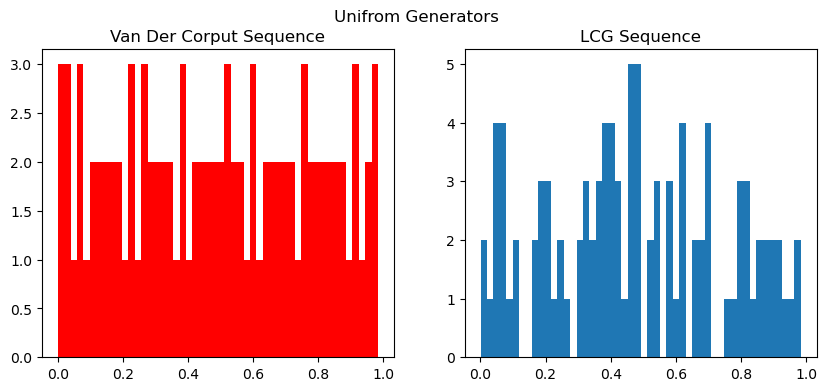

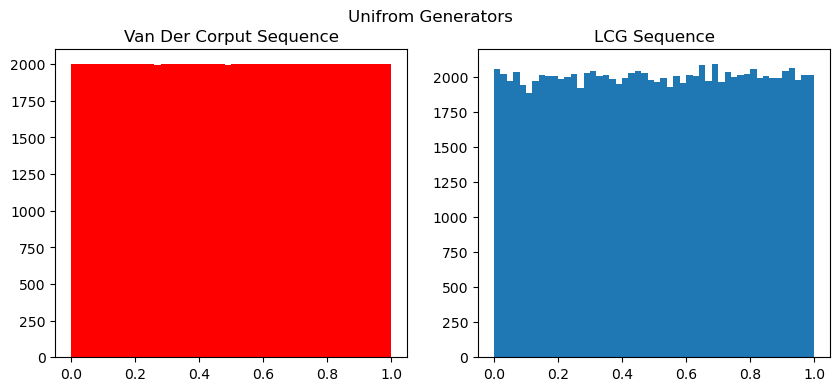

In [6]:
N = [100, 100000]
for n in N:
    x0 = 42
    vdc = []
    lcg = []
    for i in range(n):
        vdc.append(van_der_corput(i))
        x, x0 = uniform_generator(x0)
        lcg.append(x)
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ax[0].hist(vdc, bins=50, color='red')
    ax[1].hist(lcg, bins=50)

    # plot 2 subplots
    ax[0].set_title('Van Der Corput Sequence')
    ax[1].set_title('LCG Sequence')

    fig.suptitle('Unifrom Generators')
    plt.show()

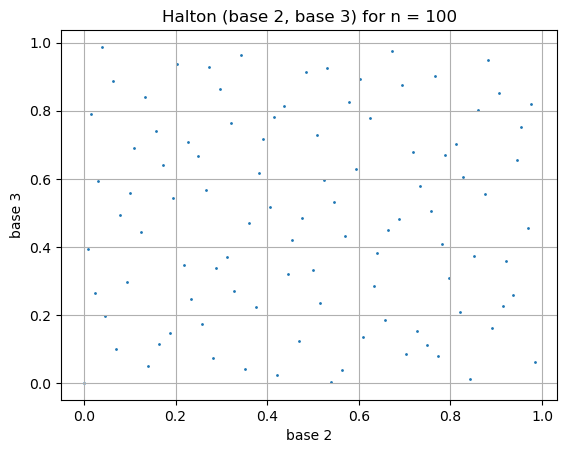

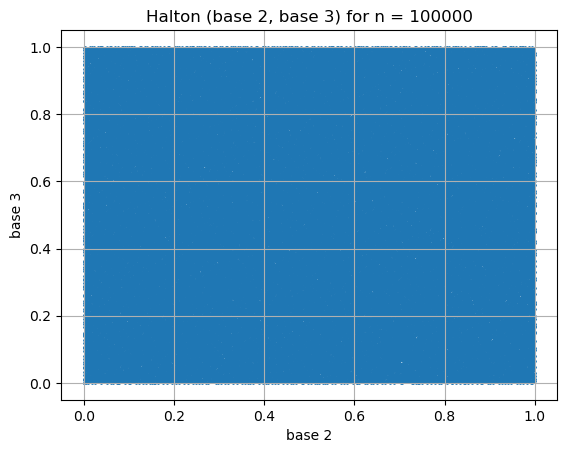

In [7]:
# Halton Sequence
x2 = []
x3 = []
N = [100, 100000]
for n in  N:
    for i in range(n):
        x2.append(van_der_corput(i, 2))
        x3.append(van_der_corput(i, 3))
    plt.grid(True) 
    plt.title(f'Halton (base 2, base 3) for n = {n}')
    plt.scatter(x2, x3, s=1)    
    plt.xlabel('base 2')
    plt.ylabel('base 3')
    plt.show()


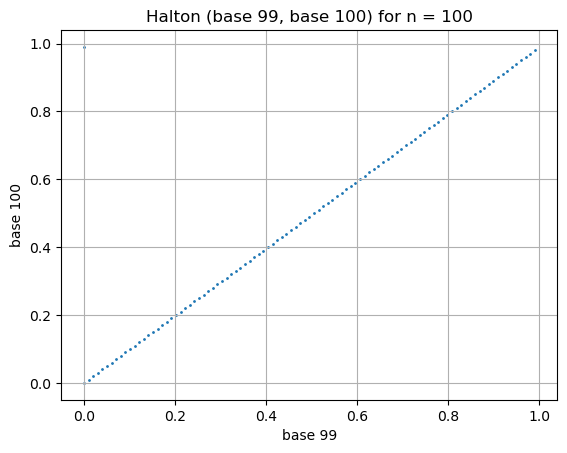

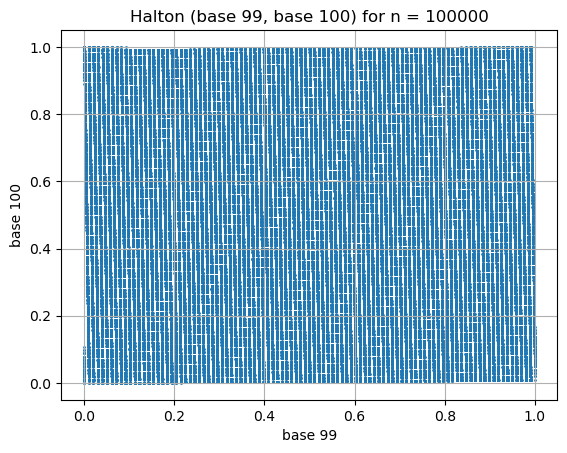

In [8]:
# Halton Sequence, fo larger bases
x2 = []
x3 = []
N = [100, 100000]
for n in  N:
    for i in range(n):
        x2.append(van_der_corput(i, 99))
        x3.append(van_der_corput(i, 100))
    plt.grid(True) 
    plt.title(f'Halton (base 99, base 100) for n = {n}')
    plt.scatter(x2, x3, s=1)
    plt.xlabel('base 99')
    plt.ylabel('base 100')
    plt.show()


# end